
The MNIST is a well-known dataset for handwritten digit localization task

In [25]:
import pandas as pd 
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from random import randrange, randint
from sklearn.model_selection import train_test_split



In [26]:
(X_train, y_train), (X_test, y_test) =mnist.load_data()

In [27]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [28]:
plt.figure(figsize=[10,5])

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

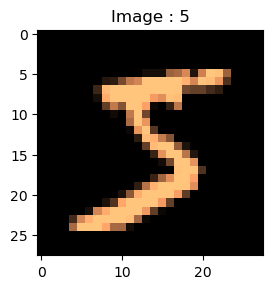

In [29]:
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='copper')
plt.title("Image : {}".format(y_train[0]));

Text(0.5, 1.0, 'Image : 7')

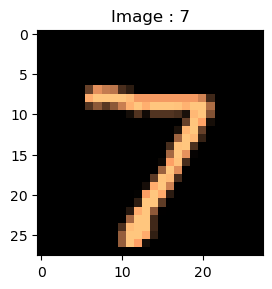

In [30]:
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='copper')
plt.title("Image : {}".format(y_test[0]))

In [31]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [32]:
y_train = to_categorical(y_train)
y_test= to_categorical(y_test)

In [33]:
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (60000, 28, 28) (60000, 10)
Testing data shape :  (10000, 28, 28) (10000, 10)


In [34]:
boxes = {
    1: [2, 3,24, 24],
    2: [2, 3,24, 24],
    3: [2, 3,24, 24],
    4: [2, 3,24, 24],
    5: [2, 3,24, 24],
    6: [2, 3,24, 24],
    7: [2, 3,24, 24],
    8: [2, 3,24, 24],
    9: [2, 3,24, 24],
    10: [2, 3,24, 24],
}

[2, 3, 24, 24]


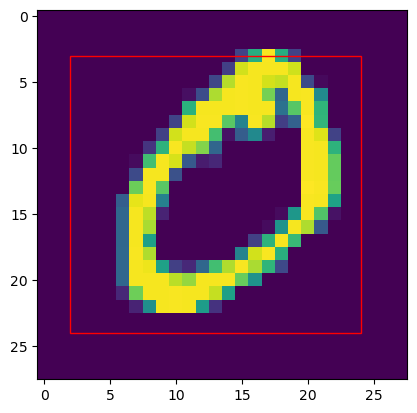

In [35]:
import cv2
import matplotlib.patches as patches

def show_img_from_df(df, ind):
    img = np.resize(np.array(df[ind][1:]), (28,28))
    
    print((boxes[ind]))
    x_min, y_min, x_max, y_max = boxes[ind]
    width = x_max - x_min
    height = y_max - y_min
    # Plot the bounding box
    fig, ax = plt.subplots()
    ax.imshow(img)
    rect = patches.Rectangle((x_min, y_min),width, height, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.show()
    
show_img_from_df(X_train, 1) #Change the index and you will check different images from boxes 


In [17]:
# Make a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Conv2D(32, (3, 3),padding='same', activation='relu', input_shape=(28, 28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               802944    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
________________________________________________

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))

In [40]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [41]:
history = model.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=5,
                    validation_data=(X_test, y_test))

Epoch 1/5
469/469 [==============================] - 240s 509ms/step - loss: 0.1751 - accuracy: 0.9432 - val_loss: 0.0571 - val_accuracy: 0.9836
Epoch 2/5
469/469 [==============================] - 239s 510ms/step - loss: 0.0431 - accuracy: 0.9868 - val_loss: 0.0367 - val_accuracy: 0.9889
Epoch 3/5
469/469 [==============================] - 237s 505ms/step - loss: 0.0294 - accuracy: 0.9913 - val_loss: 0.0260 - val_accuracy: 0.9926
Epoch 4/5
469/469 [==============================] - 237s 506ms/step - loss: 0.0209 - accuracy: 0.9935 - val_loss: 0.0256 - val_accuracy: 0.9924
Epoch 5/5
469/469 [==============================] - 239s 510ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.0299 - val_accuracy: 0.9909


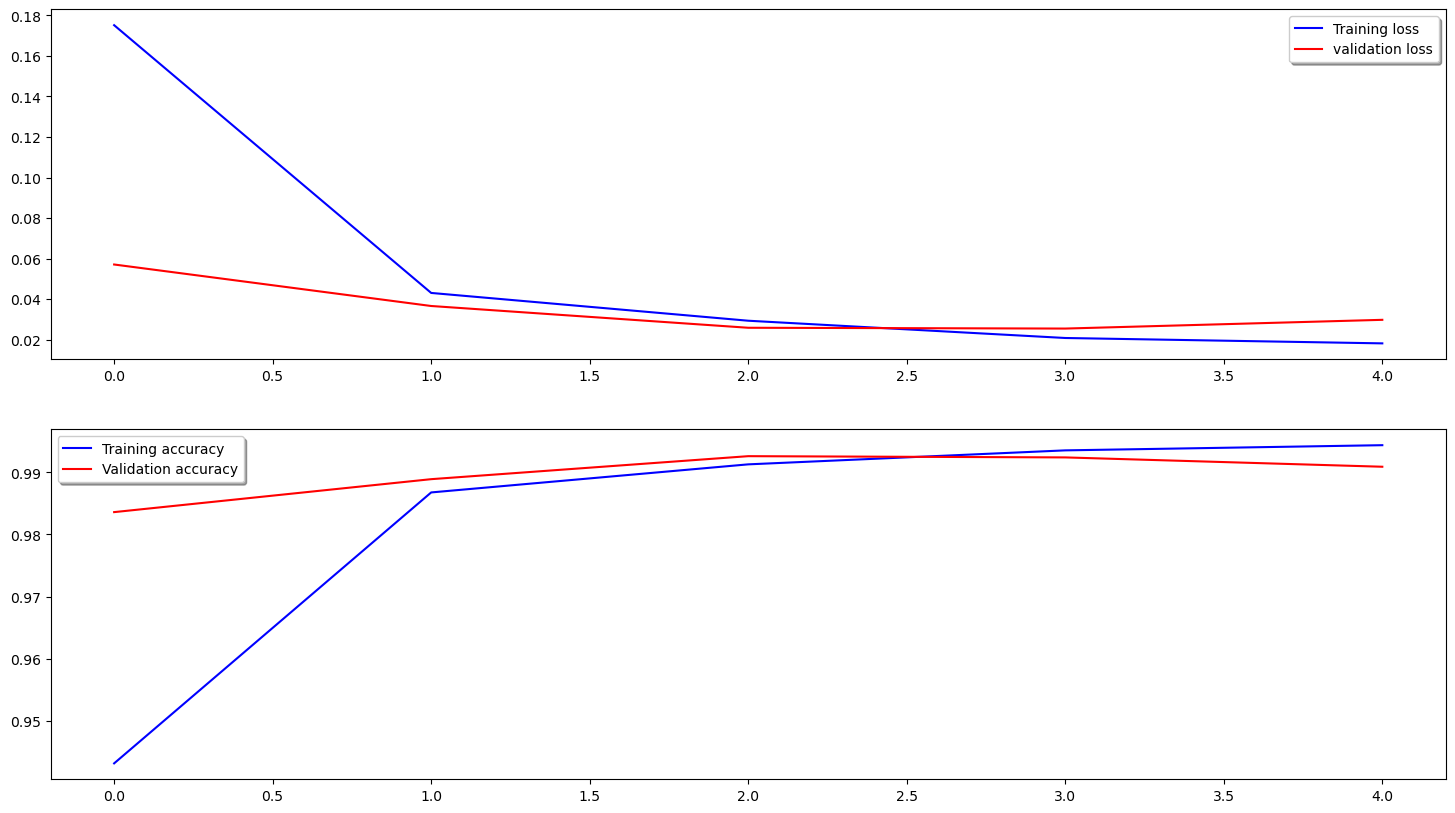

In [42]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

313/313 [==============================] - 12s 39ms/step


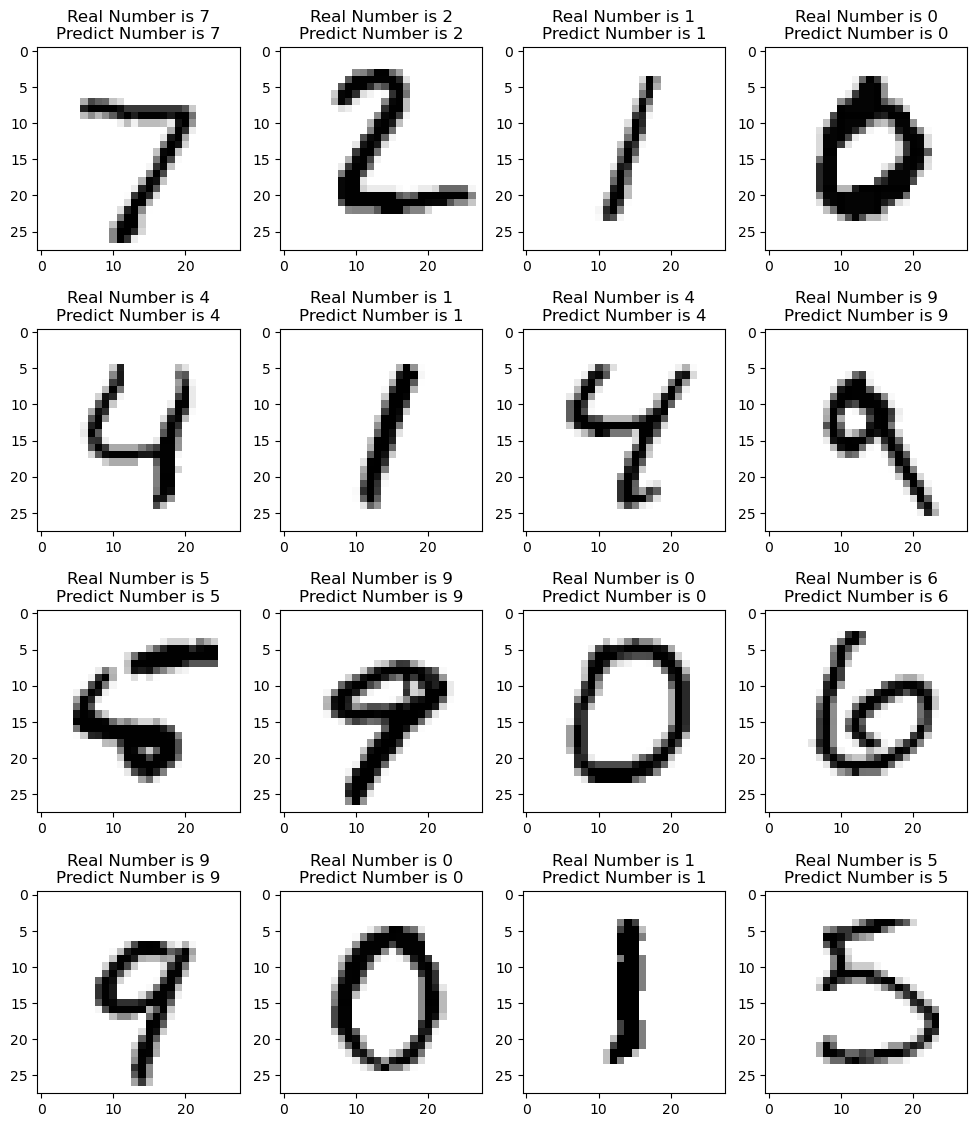

In [43]:
#Prediction validation results
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");